In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import folium
import json
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [65]:
path = r'C:\Users\Ananya\Documents\World Happiness Report'

In [66]:
report_2022 = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', '2022.csv'))

# Explore your data visually (e.g., by way of a scatterplot)

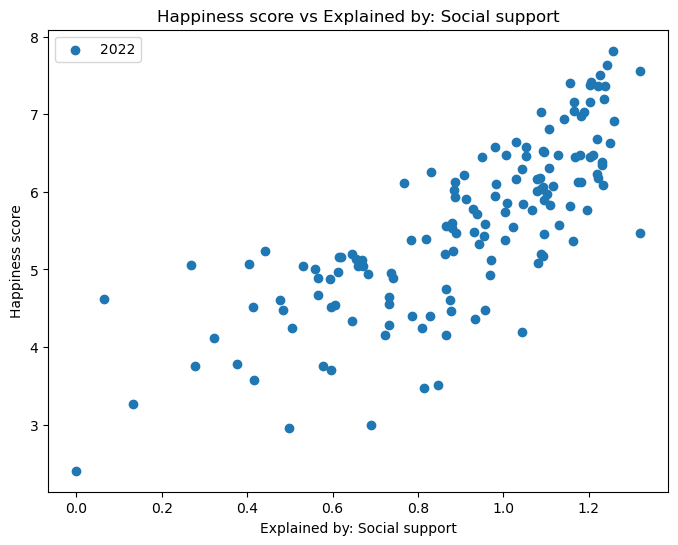

In [67]:
# Create scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(report_2022['Explained by: Social support'], report_2022['Happiness score'] )
plt.title('Happiness score vs Explained by: Social support')
plt.ylabel('Happiness score')
plt.xlabel('Explained by: Social support')
plt.legend(['2022'])
plt.show()

Hypothesis :
In the scatterplot created above we can observe that higher the social support, Higher the Happiness score in the countries 

# Linear Regression - Prepare the data

In [68]:
#reshape variables for regression 
x_social_support= report_2020['Explained by: Social support'].values.reshape(-1, 1)
y_happiness_score = report_2020['Happiness score'].values.reshape(-1, 1)

In [69]:
x_social_support_train, x_social_support_test, y_happiness_score_train, y_happiness_score_test = train_test_split(x_social_support, y_happiness_score, test_size = 0.3, random_state = 0)

# Run a linear regression on the data

In [70]:
regression = LinearRegression()
regression.fit(x_social_support_train, y_happiness_score_train)

LinearRegression()

In [71]:
y_happiness_score_predicted = regression.predict(x_social_support_test)

# Create a plot that shows the regression line on the test set

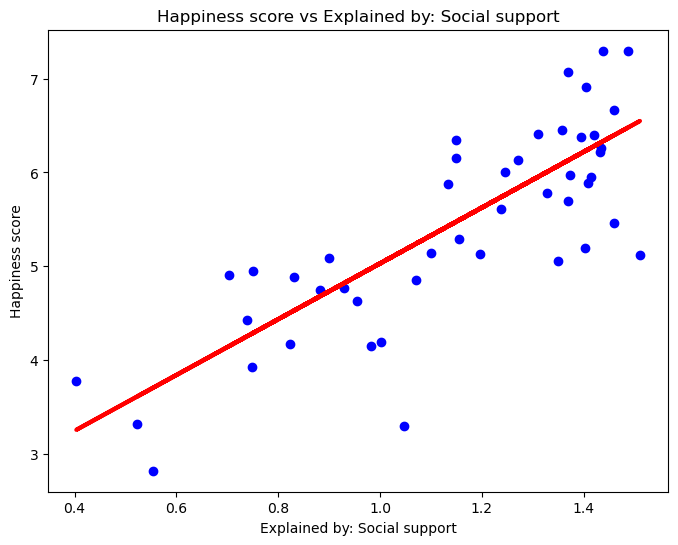

In [72]:
plt.figure(figsize=(8, 6))
plt.scatter(x_social_support_test, y_happiness_score_test, color='blue')
plt.plot(x_social_support_test, y_happiness_score_predicted, color='red', linewidth =3)
plt.title('Happiness score vs Explained by: Social support')
plt.ylabel('Happiness score')
plt.xlabel('Explained by: Social support')
plt.show()

Hypothesis : Higher the Social Support, Higher the Happiness

# Check the model performance statistics—MSE and R2 score

In [73]:
mserror = mean_squared_error(y_happiness_score_test, y_happiness_score_predicted)
r2_score = r2_score(y_happiness_score_test, y_happiness_score_predicted)
print('MS Error: ', mserror)
print('R2 Score: ', r2_score)

MS Error:  0.40567832828126443
R2 Score:  0.6398995400127822


The given MSE and R2 values indicate that the model has moderate predictive performance. 
The MSE suggests that there is some level of error in the predictions,
while the R2 value indicates that a substantial proportion of the variance in the target variable

# Compare the predicted y values with the actual y values in a dataframe.

In [74]:
data = pd.DataFrame({'Actual Happiness Score': y_happiness_score_test.flatten(), 'Predicted Happiness Score': y_happiness_score_predicted.flatten()})
data.head(20)

,Actual Happiness Score,Predicted Happiness Score
0,6.4065,5.952489
1,4.1862,5.032634
2,5.7782,6.004607
3,4.8484,5.242080
4,6.4554,6.094886
5,7.2996,6.480457
6,6.1590,5.473631
7,4.9493,4.288827
8,4.7506,4.679923
9,5.9747,6.138915


predicted  Happiness Score is closer to the Actual Happiness Score.

Some predictions are quite close to the actual values, while others deviate more significantly.
This indicates that the model is capturing some patterns in the data but may not be entirely accurate for every instance.